In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
%matplotlib inline

In [2]:
def create_sine(t, fs, frequency_of_sine):
    return np.sin(2*np.pi*frequency_of_sine*np.arange(0, t, 1./fs))
def create_cosine(t, fs, frequency_of_cosine):
    return np.cos(2*np.pi*frequency_of_cosine*np.arange(0, t, 1./fs))

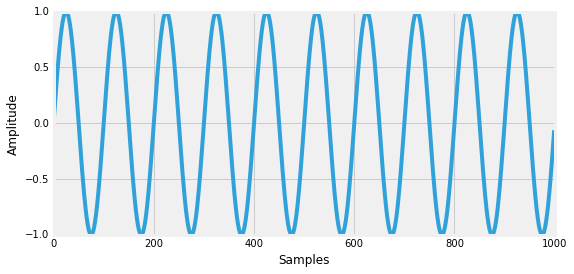

In [3]:
plt.figure(figsize=(8,4))
plt.plot(create_sine(10, 100, 1))
plt.xlabel("Samples")
plt.ylabel("Amplitude")

In [4]:
t = 10
fs = 100
N = t*fs
num_components = 4

components = np.zeros((num_components, N))
components[0] = np.ones(N)
components[1] = create_sine(t, fs, 10)
components[2] = create_sine(t, fs, 2)
components[3] = create_sine(t, fs, 0.5)

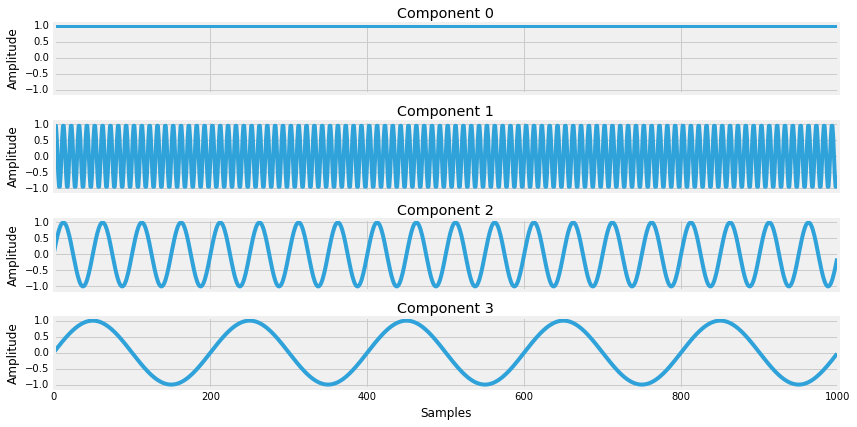

In [5]:
fig, ax  = plt.subplots(nrows=num_components, sharex=True, figsize=(12,6))
for i in range(num_components):
    ax[i].plot(components[i])
    ax[i].set_ylim((-1.1, 1.1))
    ax[i].set_title('Component {}'.format(i))
    ax[i].set_ylabel("Amplitude")
ax[num_components-1].set_xlabel("Samples")
plt.tight_layout()

In [6]:
x = -0.5*components[0]+0.1*components[1]+0.2*components[2]-0.6*components[3]

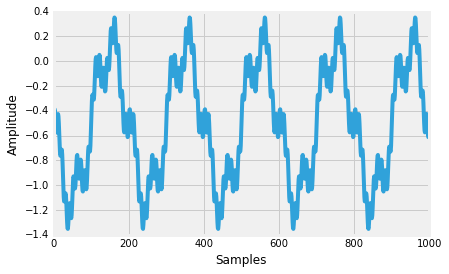

In [7]:
plt.plot(x)
plt.xlabel("Samples")
plt.ylabel("Amplitude")

In [8]:
def create_cosine_k_N(k, N):
    return np.cos((2*np.pi*k/N)*np.arange(N))
def create_sine_k_N(k, N):
    return np.sin((2*np.pi*k/N)*np.arange(N))

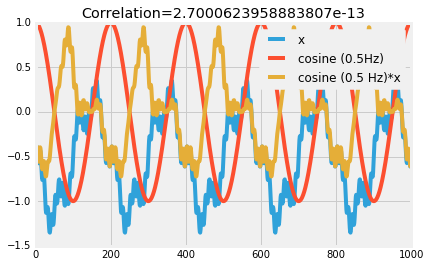

In [9]:
cos_5 = create_cosine_k_N(5,N)
plt.plot(x, label="x")
plt.plot(cos_5, label="cosine (0.5Hz)")
plt.plot(cos_5*x, label="cosine (0.5 Hz)*x")
plt.title("Correlation={}".format(np.sum(cos_5*x)))
plt.legend();

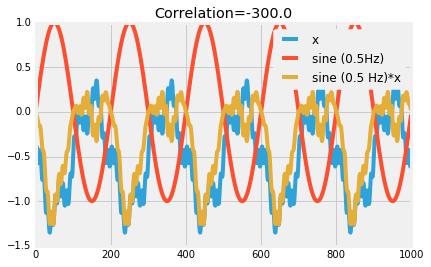

In [10]:
sin_5 = create_sine_k_N(5,N)
plt.plot(x, label="x")
plt.plot(sin_5, label="sine (0.5Hz)")
plt.plot(sin_5*x, label="sine (0.5 Hz)*x")
plt.title("Correlation={}".format(np.sum(sin_5*x)))
plt.legend();

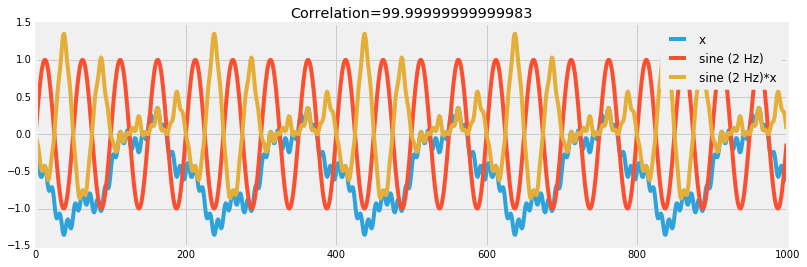

In [11]:
plt.figure(figsize=(12,4))
sin_20 = create_sine_k_N(20,N)
plt.plot(x, label="x")
plt.plot(sin_20, label="sine (2 Hz)")
plt.plot(sin_20*x, label="sine (2 Hz)*x")
plt.title("Correlation={}".format(np.sum(sin_20*x)))
plt.legend();

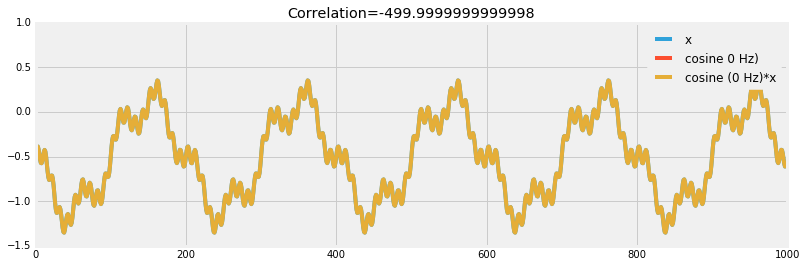

In [12]:
plt.figure(figsize=(12,4))
cos_0 = create_cosine_k_N(0,N)
plt.plot(x, label="x")
plt.plot(cos_0, label="cosine 0 Hz)")
plt.plot(cos_0*x, label="cosine (0 Hz)*x")
plt.title("Correlation={}".format(np.sum(cos_0*x)))
plt.legend();

In [13]:
fft_x = np.fft.fft(x)

In [14]:
len(fft_x)

1000

In [15]:
fft_x[0]

(-499.99999999999977+0j)

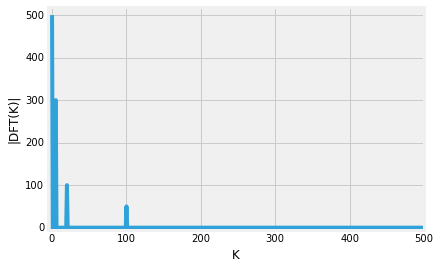

In [16]:
plt.plot(abs(fft_x)[:500])
plt.xlim((-5, 500))
plt.ylim((-5, 520))
plt.xlabel("K")
plt.ylabel("|DFT(K)|");

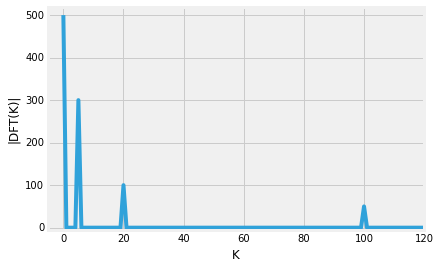

In [17]:
plt.plot(abs(fft_x)[:500])
plt.xlim((-5, 120))
plt.ylim((-5, 520))
plt.xlabel("K")
plt.ylabel("|DFT(K)|");

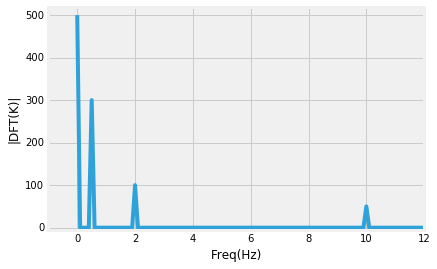

In [18]:
plt.plot(np.arange(0, 500)/10.,abs(fft_x)[:500])
plt.xlim((-1, 12))
plt.ylim((-5, 520))
plt.xlabel("Freq(Hz)")
plt.ylabel("|DFT(K)|");

In [19]:
sqr_wave = np.hstack([np.ones(250), np.zeros(250), np.ones(250), np.zeros(250)])

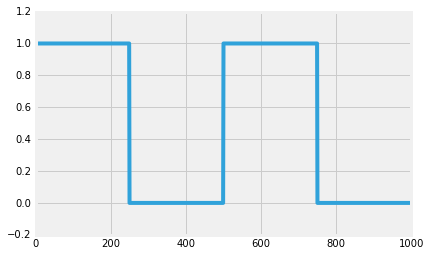

In [20]:
plt.plot(sqr_wave)
plt.ylim((-0.2,1.2));

In [21]:
dft_sqr = np.fft.fft(sqr_wave)

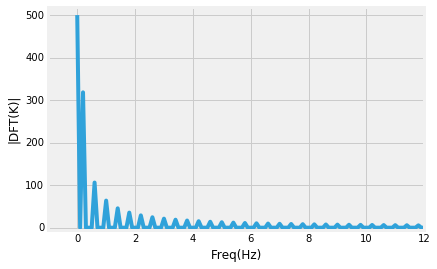

In [22]:
plt.plot(np.arange(0, 500)/10.,abs(dft_sqr)[:500])
plt.xlim((-1, 12))
plt.ylim((-5, 520))
plt.xlabel("Freq(Hz)")
plt.ylabel("|DFT(K)|");

In [23]:
!wget http://www.thesoundarchive.com/starwars/swvader01.wav

/bin/sh: wget: command not found


In [24]:
from scipy.io.wavfile import read,write

In [25]:
fs,data = read('/Users/davekensinger/Music/swvader01.wav')

In [26]:
fs

22050

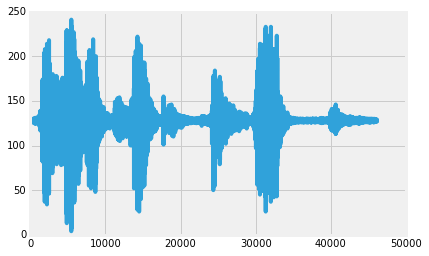

In [27]:
plt.plot(data)

In [28]:
k = np.arange(len(data))

T = len(data)/fs
T

2.0907936507936506

/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


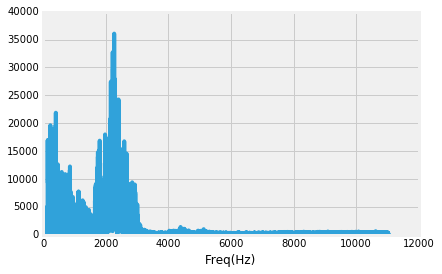

In [29]:
k = np.arange(len(data))
frq = k/T
plt.plot(frq[:len(data)/2], abs(np.fft.fft(data-np.mean(data)))[:len(data)/2])
plt.xlabel("Freq(Hz)");

In [30]:
#!/usr/bin/env python
#coding: utf-8
""" This work is licensed under a Creative Commons Attribution 3.0 Unported License.
    Frank Zalkow, 2012-2013 """

# import numpy as np
# from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize/2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)    
    
""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))
    
    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,scale[i]:], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,scale[i]:scale[i+1]], axis=1)
    
    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[scale[i]:])]
        else:
            freqs += [np.mean(allfreqs[scale[i]:scale[i+1]])]
    
    return newspec, freqs

""" plot spectrogram"""
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet"):
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)
    
    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)
    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
    
    timebins, freqbins = np.shape(ims)
    
    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])
    
    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()
        
    plt.clf()

/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/davekensinger/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:49: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


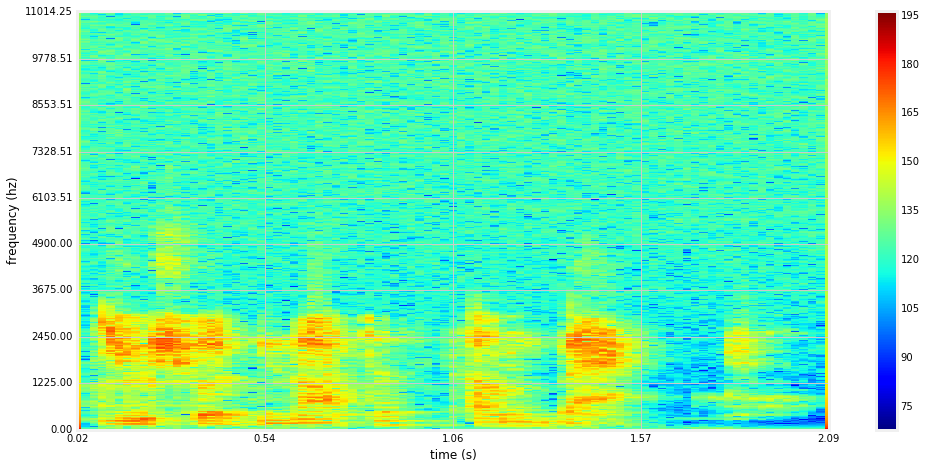

In [32]:
plotstft("/Users/davekensinger/Music/swvader01.wav")